## 뉴스 기사 제목 + 해당 기사의 본문
- 네이버 증권 주요 뉴스

In [1]:
import requests
from bs4 import BeautifulSoup

# 크롤링할 페이지 URL 설정
url = "https://finance.naver.com/news/mainnews.naver"

# 요청 시작
response = requests.get(url)
articles = []

# HTTP 요청이 성공적인지 확인
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # 뉴스 기사 목록을 포함한 부분을 찾습니다.
    news_list = soup.find("ul", class_="newsList")

    # 뉴스 제목과 링크 수집
    news_articles = news_list.find_all("li")

    for article in news_articles:
        # 뉴스 제목 추출
        title = article.find("dd").text.strip()

        # 뉴스 본문 링크 가져오기
        article_link = article.find("a")["href"]

        # 뉴스 본문 페이지에 접근
        article_url = f"https://finance.naver.com{article_link}"
        article_response = requests.get(article_url)

        if article_response.status_code == 200:
            article_soup = BeautifulSoup(article_response.text, "html.parser")

            # "link_news" 클래스를 가진 요소를 찾아서 제거합니다.
            for link_news_element in article_soup.find_all("div", class_="link_news"):
                link_news_element.decompose()

            # 뉴스 본문 추출 (articleCont 내부 텍스트만 추출)
            article_content = article_soup.find("div", id="content").get_text(separator=" ").strip()

            # 데이터 프레임 만들기 위한 제목, 본문
            articles.append (
                {
                    "title": title,
                    "content": article_content
                }
            )
        else:
            print(f"뉴스 본문 페이지에 접근할 수 없습니다: {article_url}")
else:
    print("페이지를 가져올 수 없습니다.")


In [2]:
import pandas as pd

df = pd.DataFrame(articles)
df

,title,content
0,"롯데쇼핑, 백화점·마트 매물 '우르르'…자산 유동화 성공할까",롯데마트 권선점/사진=네이버 지도 갈무리(업체 등록 사진) 롯데쇼핑이 보유중인 마...
1,"“삼성전자 주식 vs 예적금 뭐가 더 나을까요?”…어느덧 72층, 삼전개미 고민 지...",[게티이미지뱅크] [헤럴드경제=신동윤 기자] 9월 들어 ‘7만전자’에 복귀한 뒤 굳...
2,"국제 유가 연중 최고치… 정유주 ‘활짝’, 항공주 ‘울상’","2주간 S-Oil·HD현대·GS 주가 상승 두바이유 가격 연중 최고치 정제마진, 손..."
3,"“입증 안됐다”는데… 요동친 초전도체주, 서남 상한가",LK-99 검증위 “초전도성 사례 없다” 한국의 퀀텀에너지연구소 연구진이 지난 7월...
4,특판적금 '낚시광고' 사라진다… 기본·우대금리 함께 표시해야,우대금리 조건도 구체적 명시해야 추첨방식은 당첨확률도 함께 기재 게티이미지뱅크 까다...
5,"불확실한 증시, 배당으로 보험 들까?…은행·보험株 매력↑","은행주, 연초 이후 주주환원 정책 확대…보험주, 배당수익률 관점에서 트레이딩 유효 ..."
6,"""명동에 200만 중국인 몰려온다""...6년만에 호황 맞는 호텔신라",[제주=뉴시스] 우장호 기자 = 중국인 단체관광객(유커·遊客)들이 31일 오후 제주...
7,"'AI 드라이브' SKT, 네달만에 5만원 돌파 [투자360]",지난 11월 ‘AI 컴퍼니’ 전환 밝혀 자체 연구개발 서비스 ‘에이닷’ 오픈 ‘K...
8,-74% vs -85%…12년차 증시 동기 이마트·하이마트의 주가 잔혹사,서울의 한 이마트 매장에서 장을 보는 시민들의 모습. [출처 : 연합뉴스] 지난 2...
9,"""큰물에서 놀자""…뉴욕 증시 뛰어든 한국기업, 주가는 '글쎄'",미국 뉴욕증권거래소(NYSE)에 상장한 국내 기업의 올해 주가 변동률. 올해 미국...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    20 non-null     object
 1   content  20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [4]:
df.head()

,title,content
0,"롯데쇼핑, 백화점·마트 매물 '우르르'…자산 유동화 성공할까",롯데마트 권선점/사진=네이버 지도 갈무리(업체 등록 사진) 롯데쇼핑이 보유중인 마...
1,"“삼성전자 주식 vs 예적금 뭐가 더 나을까요?”…어느덧 72층, 삼전개미 고민 지...",[게티이미지뱅크] [헤럴드경제=신동윤 기자] 9월 들어 ‘7만전자’에 복귀한 뒤 굳...
2,"국제 유가 연중 최고치… 정유주 ‘활짝’, 항공주 ‘울상’","2주간 S-Oil·HD현대·GS 주가 상승 두바이유 가격 연중 최고치 정제마진, 손..."
3,"“입증 안됐다”는데… 요동친 초전도체주, 서남 상한가",LK-99 검증위 “초전도성 사례 없다” 한국의 퀀텀에너지연구소 연구진이 지난 7월...
4,특판적금 '낚시광고' 사라진다… 기본·우대금리 함께 표시해야,우대금리 조건도 구체적 명시해야 추첨방식은 당첨확률도 함께 기재 게티이미지뱅크 까다...


In [5]:
df.to_csv('news_data.csv', index=False)

## 형태소 분석
- 명사만 추출하기

In [6]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 30.7 MB/s eta 0:00:00


In [7]:
from konlpy.tag import Okt
from tqdm import tqdm

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    20 non-null     object
 1   content  20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [9]:
df.dropna(inplace=True)

In [10]:
okt = Okt()
poss_dic = {}

for i in tqdm(df.index):
    # 1. (형태소, 품사) 형식의 튜플들로 분리하는 품사 태깅의 작업을 하여 리스트로 저장
    content = df.loc[i, "content"]
    content = str(content)
    poss = okt.pos(content, norm=True, stem=True)

    # 2. 명사인 것만 poss_lst에 저장 (1글자인 단어는 제외)
    poss_lst = []
    for word, tag in poss:
        if tag in ['Noun'] and len(word) > 1:
            poss_lst.append(word)

    # 3. 기사의 인덱스를 key로 갖고 본문을 형태소 단위로 분리한 리스트를 value
    poss_dic[i] = poss_lst


100%|██████████| 20/20 [00:21<00:00,  1.10s/it]


In [11]:
poss_dic

{0: ['롯데',
  '마트',
  '권선',
  '사진',
  '네이버',
  '지도',
  '갈무리',
  '업체',
  '등록',
  '사진',
  '롯데',
  '쇼핑',
  '보유',
  '마트',
  '백화점',
  '부동산',
  '자산',
  '매각',
  '경기',
  '침체',
  '유통업체',
  '어려움',
  '가운데',
  '자산',
  '매각',
  '대규모',
  '현금',
  '확보',
  '나선',
  '워낙',
  '대규모',
  '매각',
  '유통업',
  '회수',
  '일정',
  '시장',
  '성사',
  '가능성',
  '대해',
  '회의',
  '시선',
  '투자',
  '은행',
  '업계',
  '롯데',
  '쇼핑',
  '관사',
  '나이',
  '코리아',
  '로부터',
  '롯데',
  '마트',
  '자산',
  '인수',
  '의향',
  '제출',
  '롯데',
  '쇼핑',
  '측은',
  '매각',
  '희망',
  '원매',
  '제시',
  '가격',
  '비교',
  '협상',
  '진행',
  '예정',
  '이번',
  '롯데',
  '쇼핑',
  '롯데',
  '마트',
  '자산',
  '롯데',
  '마트',
  '권선',
  '옥외',
  '주차장',
  '롯데',
  '마트',
  '고양',
  '중산',
  '롯데',
  '마트',
  '웅상',
  '옥외',
  '주차장',
  '롯데',
  '슈퍼',
  '대전',
  '롯데',
  '슈퍼',
  '가점',
  '롯데',
  '슈퍼',
  '안중',
  '롯데',
  '슈퍼',
  '주점',
  '롯데',
  '슈퍼',
  '태안',
  '남양주',
  '양지',
  '롯데',
  '쇼핑',
  '롯데',
  '백화점',
  '자산',
  '시장',
  '매물',
  '분당',
  '물류',
  '센터',
  '안산',
  '공장',
  '롯데',
  '슈퍼',
  '포항',
  '롯데리아',
  '죽도',
 

In [12]:
import pandas as pd

# poss_dic 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(poss_dic, orient='index')

# CSV 파일로 저장 (index는 저장하지 않음)
df.to_csv('news_word_data.csv', index=False)


## 불용어 처리

In [18]:
pip install konlpy

In [19]:
from konlpy.tag import Komoran

In [15]:
all_words = []

for words in poss_dic.values():
    all_words.extend(words)
    all_words = list(all_words)

In [16]:
print(all_words)

['롯데', '마트', '권선', '사진', '네이버', '지도', '갈무리', '업체', '등록', '사진', '롯데', '쇼핑', '보유', '마트', '백화점', '부동산', '자산', '매각', '경기', '침체', '유통업체', '어려움', '가운데', '자산', '매각', '대규모', '현금', '확보', '나선', '워낙', '대규모', '매각', '유통업', '회수', '일정', '시장', '성사', '가능성', '대해', '회의', '시선', '투자', '은행', '업계', '롯데', '쇼핑', '관사', '나이', '코리아', '로부터', '롯데', '마트', '자산', '인수', '의향', '제출', '롯데', '쇼핑', '측은', '매각', '희망', '원매', '제시', '가격', '비교', '협상', '진행', '예정', '이번', '롯데', '쇼핑', '롯데', '마트', '자산', '롯데', '마트', '권선', '옥외', '주차장', '롯데', '마트', '고양', '중산', '롯데', '마트', '웅상', '옥외', '주차장', '롯데', '슈퍼', '대전', '롯데', '슈퍼', '가점', '롯데', '슈퍼', '안중', '롯데', '슈퍼', '주점', '롯데', '슈퍼', '태안', '남양주', '양지', '롯데', '쇼핑', '롯데', '백화점', '자산', '시장', '매물', '분당', '물류', '센터', '안산', '공장', '롯데', '슈퍼', '포항', '롯데리아', '죽도', '포항', '사업', '관악', '문화센터', '롯데', '시네마', '홍대', '정점', '일부', '청주', '플라자', '큐브', '부산', '광복', '매물', '관련', '제출', '롯데', '쇼핑', '부동산', '자산', '규모', '평가', '리테일', '물류', '센터', '자산군', '시장', '만큼', '매각', '대신', '자산', '별로', '매각', '추진', '전망', '롯데', '쇼핑', '희망', '매각', 

In [20]:
stop_words = ["시장", "증권", "주가", "배당", "기업", "투자", "지난", "국내", "올해"]

In [25]:
from konlpy.tag import Komoran

# 형태소 분석기 초기화
komoran = Komoran()

def remove_stopwords(word_list):
    filtered_tokens = [word for word in word_list if word not in stop_words]
    return ' '.join(filtered_tokens)

# 불용어 처리 예제
processed_article = remove_stopwords(all_words)
print(processed_article)

# tags = list(processed_article)

롯데 마트 권선 사진 네이버 지도 갈무리 업체 등록 사진 롯데 쇼핑 보유 마트 백화점 부동산 자산 매각 경기 침체 유통업체 어려움 가운데 자산 매각 대규모 현금 확보 나선 워낙 대규모 매각 유통업 회수 일정 성사 가능성 대해 회의 시선 은행 업계 롯데 쇼핑 관사 나이 코리아 로부터 롯데 마트 자산 인수 의향 제출 롯데 쇼핑 측은 매각 희망 원매 제시 가격 비교 협상 진행 예정 이번 롯데 쇼핑 롯데 마트 자산 롯데 마트 권선 옥외 주차장 롯데 마트 고양 중산 롯데 마트 웅상 옥외 주차장 롯데 슈퍼 대전 롯데 슈퍼 가점 롯데 슈퍼 안중 롯데 슈퍼 주점 롯데 슈퍼 태안 남양주 양지 롯데 쇼핑 롯데 백화점 자산 매물 분당 물류 센터 안산 공장 롯데 슈퍼 포항 롯데리아 죽도 포항 사업 관악 문화센터 롯데 시네마 홍대 정점 일부 청주 플라자 큐브 부산 광복 매물 관련 제출 롯데 쇼핑 부동산 자산 규모 평가 리테일 물류 센터 자산군 만큼 매각 대신 자산 별로 매각 추진 전망 롯데 쇼핑 희망 매각 만큼 원매 제안 가격 합당 인수 능력 판단 거래 종결 롯데 쇼핑 측은 이번 매각 관련 대부분 영업 자산 매각 보유 자산 가치 시가 평가 차원 설명 업계 취득 입금 롯데 쇼핑 자산 유동화 가능성 롯데 쇼핑 조정 순차 입금 지난해 일각 매각 해당 자산 롯데 리츠 편입 가능성 기한 롯데 리츠 백화점 아울렛 마트 자산 포함 상장 당시 영업 부실 자산 일부 편입 비판 업계 관계자 지난해 일진 머티리얼즈 인수 롯데 건설 자금 지원 롯데 그룹 유동성 상황 라며 롯데 마트 관련 물건 개별 매각 일부 자산 롯데 리츠 편입 움직임 이번 롯데 쇼핑 자산 매각 성공 대해 서도 미지수 평가 경기 침체 경기 자산 대부분 백화점 마트 롯데 프리미엄 제외 향후 수익 이유 이번 매각 자산 가장 매력 분당 물류 센터 부지 대규모 부지 개발 가능성 시행 입찰 참여 검토 분당 물류 센터 부지 목표 가액 게티 이미지 뱅크 헤럴드경제 동윤 기자 복귀 삼성 전자 박스 완만 우상 곡선 그리기 시작 삼성 전자 인공 지능 반도

In [34]:
from collections import Counter

count = Counter(all_words)
tags = count.most_common(50)
tags[:50]

[('시장', 78),
 ('증권', 66),
 ('주가', 61),
 ('배당', 58),
 ('로봇', 58),
 ('상장', 52),
 ('두산', 52),
 ('기업', 47),
 ('투자', 41),
 ('로보틱스', 41),
 ('롯데', 39),
 ('대표', 36),
 ('지난', 31),
 ('국내', 30),
 ('금융', 30),
 ('올해', 29),
 ('가격', 28),
 ('영업', 27),
 ('수익률', 27),
 ('공모', 26),
 ('가능성', 25),
 ('상승', 25),
 ('미국', 25),
 ('예상', 25),
 ('연구원', 24),
 ('코스피', 23),
 ('금리', 23),
 ('이익', 23),
 ('최근', 23),
 ('종목', 22),
 ('중국', 22),
 ('대비', 21),
 ('이후', 21),
 ('회사', 21),
 ('협동', 21),
 ('자산', 20),
 ('지수', 20),
 ('실적', 20),
 ('부동산', 19),
 ('거래', 19),
 ('은행', 18),
 ('사업', 18),
 ('개발', 18),
 ('수준', 18),
 ('수요', 18),
 ('유가', 18),
 ('한국', 17),
 ('증시', 17),
 ('매출', 17),
 ('서비스', 17)]

## 워드 클라우드 생성
- 한글 깨짐 이슈 : 폰트 설치해서 적용할 것

In [26]:
!apt-get update -qq
!apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 28 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

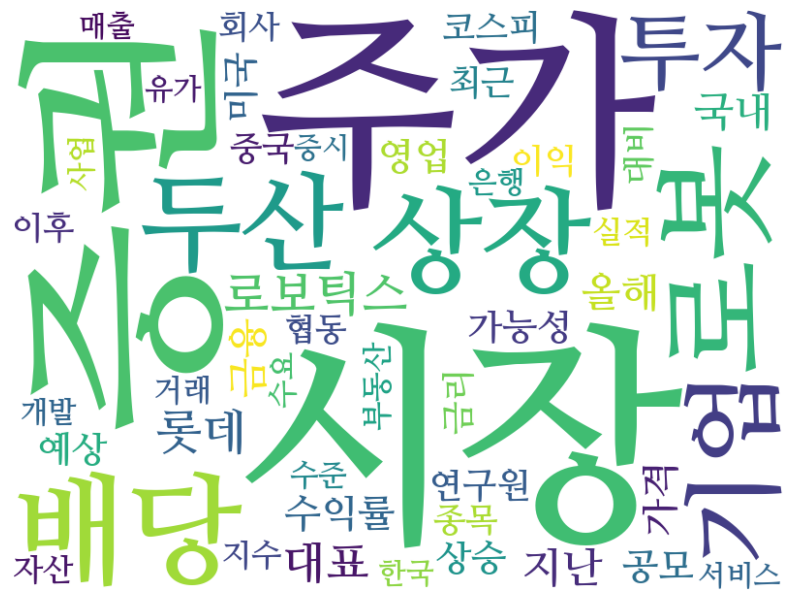

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager, rc

# 나눔 폰트 경로 설정
font_location = "/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# tags 리스트를 사전으로 변환
word_freq = {}
for tag in tags:
    word, freq = tag[0], tag[1]
    word_freq[word] = freq

# 워드 클라우드 설정
wc = WordCloud(font_path=font_location, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(word_freq)

# 워드 클라우드를 화면에 표시
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
